In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
print("\nStep 3: Setting dataset path...")

data_dir = "/kaggle/input/datasets/obulisainaren/multi-cancer/Multi Cancer/Multi Cancer/Brain Cancer"

print("Dataset directory set to:")
print(data_dir)


Step 3: Setting dataset path...
Dataset directory set to:
/kaggle/input/datasets/obulisainaren/multi-cancer/Multi Cancer/Multi Cancer/Brain Cancer


In [5]:
print("\nStep 4: Defining image transformations...")

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

print("Images will be resized to 224x224 and converted to tensors.")


Step 4: Defining image transformations...
Images will be resized to 224x224 and converted to tensors.


In [7]:
print("\nStep 5: Loading dataset using ImageFolder...")

dataset = datasets.ImageFolder(root=data_dir, transform=transform)

print("Dataset loaded successfully.")

print("Classes found in dataset:")
print(dataset.classes)

print("Total images in dataset:", len(dataset))


Step 5: Loading dataset using ImageFolder...
Dataset loaded successfully.
Classes found in dataset:
['brain_glioma', 'brain_menin', 'brain_tumor']
Total images in dataset: 15000


In [8]:
print("\nStep 6: Splitting dataset into train and test sets...")

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print("Training images:", train_size)
print("Testing images:", test_size)


Step 6: Splitting dataset into train and test sets...
Training images: 12000
Testing images: 3000


In [9]:
print("\nStep 7: Creating DataLoaders...")

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Batch size:", 32)
print("Training loader and testing loader ready.")


Step 7: Creating DataLoaders...
Batch size: 32
Training loader and testing loader ready.


In [10]:
print("\nStep 8: Loading EfficientNet-B0 pretrained model...")

model = models.efficientnet_b0(weights="IMAGENET1K_V1")

print("EfficientNet-B0 model loaded.")


Step 8: Loading EfficientNet-B0 pretrained model...
EfficientNet-B0 model loaded.


In [11]:
print("\nStep 9: Freezing feature extraction layers...")

for param in model.parameters():
    param.requires_grad = False

print("All backbone layers frozen.")
print("Only the classifier will be trained.")


Step 9: Freezing feature extraction layers...
All backbone layers frozen.
Only the classifier will be trained.


In [12]:
print("\nStep 10: Modifying final classification layer...")

num_classes = len(dataset.classes)

model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

for param in model.classifier.parameters():
    param.requires_grad = True

model = model.to(device)

print("Classifier updated for", num_classes, "classes.")
print("Model moved to:", device)


Step 10: Modifying final classification layer...
Classifier updated for 3 classes.
Model moved to: cuda


In [13]:
print("\nStep 11: Defining loss function and optimizer...")

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Loss Function: CrossEntropyLoss")
print("Optimizer: Adam")
print("Learning rate: 0.001")


Step 11: Defining loss function and optimizer...
Loss Function: CrossEntropyLoss
Optimizer: Adam
Learning rate: 0.001


In [14]:
print("\nStep 12: Setting training parameters...")

num_epochs = 50

print("Number of epochs:", num_epochs)


Step 12: Setting training parameters...
Number of epochs: 50


In [15]:
print("\nStep 13: Starting training...")

start_train = time.time()

for epoch in range(num_epochs):

    model.train()
    running_loss = 0

    for images, labels in train_loader:

        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs} completed | Loss: {running_loss:.4f}")

end_train = time.time()

training_time = end_train - start_train

print("\nTraining finished.")
print("Training time (seconds):", training_time)
print("Training time (minutes):", training_time/60)


Step 13: Starting training...
Epoch 1/50 completed | Loss: 143.9219
Epoch 2/50 completed | Loss: 93.6268
Epoch 3/50 completed | Loss: 83.8819
Epoch 4/50 completed | Loss: 77.1434
Epoch 5/50 completed | Loss: 74.9636
Epoch 6/50 completed | Loss: 74.9370
Epoch 7/50 completed | Loss: 72.5781
Epoch 8/50 completed | Loss: 69.0534
Epoch 9/50 completed | Loss: 67.8732
Epoch 10/50 completed | Loss: 67.1469
Epoch 11/50 completed | Loss: 65.7155
Epoch 12/50 completed | Loss: 66.4598
Epoch 13/50 completed | Loss: 66.3938
Epoch 14/50 completed | Loss: 66.6448
Epoch 15/50 completed | Loss: 65.9784
Epoch 16/50 completed | Loss: 64.2347
Epoch 17/50 completed | Loss: 64.1845
Epoch 18/50 completed | Loss: 65.5725
Epoch 19/50 completed | Loss: 64.2410
Epoch 20/50 completed | Loss: 65.5728
Epoch 21/50 completed | Loss: 64.0752
Epoch 22/50 completed | Loss: 65.0622
Epoch 23/50 completed | Loss: 63.9533
Epoch 24/50 completed | Loss: 63.6099
Epoch 25/50 completed | Loss: 65.7557
Epoch 26/50 completed | Los

In [16]:
print("\nStep 14: Evaluating model on test data...")

start_test = time.time()

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():

    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

end_test = time.time()

testing_time = end_test - start_test

print("Testing completed.")
print("Testing time (seconds):", testing_time)
print("Testing time (minutes):", testing_time/60)


Step 14: Evaluating model on test data...
Testing completed.
Testing time (seconds): 23.379136323928833
Testing time (minutes): 0.38965227206548053


In [18]:
print("\nStep 15: Calculating accuracy...")

correct = np.sum(np.array(all_preds) == np.array(all_labels))
total = len(all_labels)

accuracy = correct / total

print("Total samples:", total)
print("Correct predictions:", correct)
print("Accuracy:", accuracy)


Step 15: Calculating accuracy...
Total samples: 3000
Correct predictions: 2888
Accuracy: 0.9626666666666667


In [22]:
print("\nStep 16: Generating classification report...")

report = classification_report(all_labels, all_preds)

print(report)


Step 16: Generating classification report...
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       982
           1       0.96      0.94      0.95      1026
           2       0.96      0.97      0.96       992

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [24]:
print("\nStep 17: Creating confusion matrix...")

cm = confusion_matrix(all_labels, all_preds)

print("Confusion Matrix:")
print(cm)


Step 17: Creating confusion matrix...
Confusion Matrix:
[[966  13   3]
 [ 27 960  39]
 [  3  27 962]]


In [25]:
print("\nStep 18: Calculating AUC score...")

try:
    auc = roc_auc_score(all_labels, all_preds)
    print("AUC Score:", auc)
except:
    print("AUC could not be calculated for this dataset.")


Step 18: Calculating AUC score...
AUC could not be calculated for this dataset.


In [26]:
print("\nStep 19: Final model summary...")

results = {
    "Model": "EfficientNetB0",
    "Accuracy": accuracy,
    "Training Time (minutes)": training_time/60,
    "Testing Time (seconds)": testing_time
}

print(results)


Step 19: Final model summary...
{'Model': 'EfficientNetB0', 'Accuracy': np.float64(0.9626666666666667), 'Training Time (minutes)': 58.87018061081569, 'Testing Time (seconds)': 23.379136323928833}


In [27]:
print("\nStep 20: Calculating Class Accuracy...")

cm = confusion_matrix(all_labels, all_preds)

class_accuracy = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(class_accuracy):
    print(f"Class {dataset.classes[i]} Accuracy: {acc:.4f}")


Step 20: Calculating Class Accuracy...
Class brain_glioma Accuracy: 0.9837
Class brain_menin Accuracy: 0.9357
Class brain_tumor Accuracy: 0.9698


In [31]:
print("\nCollecting prediction probabilities for ROC curve...")

all_probs = []
all_labels = []

model.eval()

with torch.no_grad():
    for images, labels in test_loader:

        images = images.to(device)

        outputs = model(images)

        probs = torch.softmax(outputs, dim=1)

        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.numpy())

In [30]:
import numpy as np

all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

In [33]:
from sklearn.preprocessing import label_binarize

num_classes = len(dataset.classes)

labels_onehot = label_binarize(all_labels, classes=list(range(num_classes)))

In [35]:
print("\nStep 23: Calculating AUC...")

auc = roc_auc_score(labels_onehot, all_probs, multi_class="ovr")

print("AUC Score:", auc)


Step 23: Calculating AUC...
AUC Score: 0.9963798706826169


In [38]:
import numpy as np
import torch
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [39]:
model.eval()

all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)

        all_probs.append(probs.cpu().numpy())
        all_labels.append(labels.numpy())

all_probs = np.concatenate(all_probs)
all_labels = np.concatenate(all_labels)

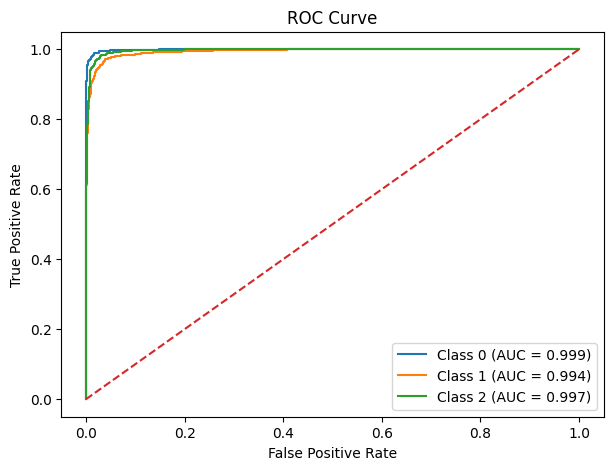

In [42]:
import numpy as np
import torch
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

model.eval()

all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)

        all_probs.append(probs.cpu().numpy())
        all_labels.append(labels.numpy())

all_probs = np.concatenate(all_probs)
all_labels = np.concatenate(all_labels)

# automatically detect class count
num_classes = all_probs.shape[1]

binary_labels = label_binarize(all_labels, classes=range(num_classes))

fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(binary_labels[:, i], all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7,5))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.3f})")

plt.plot([0,1],[0,1],'--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()